# Housing Rental Analysis for San Francisco

In this challenge, your job is to use your data visualization skills, including aggregation, interactive visualizations, and geospatial analysis, to find properties in the San Francisco market that are viable investment opportunities.

## Instructions

Use the `san_francisco_housing.ipynb` notebook to visualize and analyze the real-estate data.

Note that this assignment requires you to create a visualization by using hvPlot and GeoViews. Additionally, you need to read the `sfo_neighborhoods_census_data.csv` file from the `Resources` folder into the notebook and create the DataFrame that you’ll use in the analysis.

The main task in this Challenge is to visualize and analyze the real-estate data in your Jupyter notebook. Use the `san_francisco_housing.ipynb` notebook to complete the following tasks:

* Calculate and plot the housing units per year.

* Calculate and plot the average prices per square foot.

* Compare the average prices by neighborhood.

* Build an interactive neighborhood map.

* Compose your data story.

### Calculate and Plot the Housing Units per Year

For this part of the assignment, use numerical and visual aggregation to calculate the number of housing units per year, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Use the `groupby` function to group the data by year. Aggregate the results by the `mean` of the groups.

2. Use the `hvplot` function to plot the `housing_units_by_year` DataFrame as a bar chart. Make the x-axis represent the `year` and the y-axis represent the `housing_units`.

3. Style and format the line plot to ensure a professionally styled visualization.

4. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting bar chart.](Images/zoomed-housing-units-by-year.png)

5. Answer the following question:

    * What’s the overall trend in housing units over the period that you’re analyzing?

### Calculate and Plot the Average Sale Prices per Square Foot

For this part of the assignment, use numerical and visual aggregation to calculate the average prices per square foot, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Group the data by year, and then average the results. What’s the lowest gross rent that’s reported for the years that the DataFrame includes?

2. Create a new DataFrame named `prices_square_foot_by_year` by filtering out the “housing_units” column. The new DataFrame should include the averages per year for only the sale price per square foot and the gross rent.

3. Use hvPlot to plot the `prices_square_foot_by_year` DataFrame as a line plot.

    > **Hint** This single plot will include lines for both `sale_price_sqr_foot` and `gross_rent`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/avg-sale-px-sq-foot-gross-rent.png)

6. Use both the `prices_square_foot_by_year` DataFrame and interactive plots to answer the following questions:

    * Did any year experience a drop in the average sale price per square foot compared to the previous year?

    * If so, did the gross rent increase or decrease during that year?

### Compare the Average Sale Prices by Neighborhood

For this part of the assignment, use interactive visualizations and widgets to explore the average sale price per square foot by neighborhood. To do so, complete the following steps:

1. Create a new DataFrame that groups the original DataFrame by year and neighborhood. Aggregate the results by the `mean` of the groups.

2. Filter out the “housing_units” column to create a DataFrame that includes only the `sale_price_sqr_foot` and `gross_rent` averages per year.

3. Create an interactive line plot with hvPlot that visualizes both `sale_price_sqr_foot` and `gross_rent`. Set the x-axis parameter to the year (`x="year"`). Use the `groupby` parameter to create an interactive widget for `neighborhood`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/pricing-info-by-neighborhood.png)

6. Use the interactive visualization to answer the following question:

    * For the Anza Vista neighborhood, is the average sale price per square foot for 2016 more or less than the price that’s listed for 2012? 

### Build an Interactive Neighborhood Map

For this part of the assignment, explore the geospatial relationships in the data by using interactive visualizations with hvPlot and GeoViews. To build your map, use the `sfo_data_df` DataFrame (created during the initial import), which includes the neighborhood location data with the average prices. To do all this, complete the following steps:

1. Read the `neighborhood_coordinates.csv` file from the `Resources` folder into the notebook, and create a DataFrame named `neighborhood_locations_df`. Be sure to set the `index_col` of the DataFrame as “Neighborhood”.

2. Using the original `sfo_data_df` Dataframe, create a DataFrame named `all_neighborhood_info_df` that groups the data by neighborhood. Aggregate the results by the `mean` of the group.

3. Review the two code cells that concatenate the `neighborhood_locations_df` DataFrame with the `all_neighborhood_info_df` DataFrame. Note that the first cell uses the [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to create a DataFrame named `all_neighborhoods_df`. The second cell cleans the data and sets the “Neighborhood” column. Be sure to run these cells to create the `all_neighborhoods_df` DataFrame, which you’ll need to create the geospatial visualization.

4. Using hvPlot with GeoViews enabled, create a `points` plot for the `all_neighborhoods_df` DataFrame. Be sure to do the following:

    * Set the `geo` parameter to True.
    * Set the `size` parameter to “sale_price_sqr_foot”.
    * Set the `color` parameter to “gross_rent”.
    * Set the `frame_width` parameter to 700.
    * Set the `frame_height` parameter to 500.
    * Include a descriptive title.

Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of a scatter plot created with hvPlot and GeoViews.](Images/6-4-geoviews-plot.png)

5. Use the interactive map to answer the following question:

    * Which neighborhood has the highest gross rent, and which has the highest sale price per square foot?

### Compose Your Data Story

Based on the visualizations that you created, answer the following questions:

* How does the trend in rental income growth compare to the trend in sales prices? Does this same trend hold true for all the neighborhoods across San Francisco?

* What insights can you share with your company about the potential one-click, buy-and-rent strategy that they're pursuing? Do neighborhoods exist that you would suggest for investment, and why?

In [ ]:
# Import the required libraries and dependencies
import pandas as pd
import hvplot.pandas
from pathlib import Path

## Import the data 

In [ ]:
# Using the read_csv function and Path module, create a DataFrame 
# by importing the sfo_neighborhoods_census_data.csv file from the Resources folder
sfo_data_df = pd.read_csv(
    Path('./Resources/sfo_neighborhoods_census_data.csv')
)

# For refrence only, check how many NaN entries are in dataframe
display("Number of Nan entries = ", sfo_data_df.isna().sum().sum())   # isna() returns True/False for every entry, first .sum() returns sum for every column, second .sum() returns sum across columns

# Drop Nan entries
sfo_data_df.dropna(inplace=True)

# Review the first and last five rows of the DataFrame
display("sfo_data_df head:", sfo_data_df.head())
display("sfo_data_df tail:", sfo_data_df.tail())

---

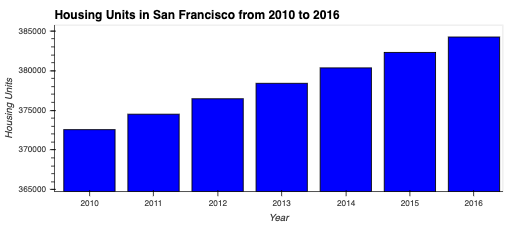## Calculate and Plot the Housing Units per Year

For this part of the assignment, use numerical and visual aggregation to calculate the number of housing units per year, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Use the `groupby` function to group the data by year. Aggregate the results by the `mean` of the groups.

2. Use the `hvplot` function to plot the `housing_units_by_year` DataFrame as a bar chart. Make the x-axis represent the `year` and the y-axis represent the `housing_units`.

3. Style and format the line plot to ensure a professionally styled visualization.

4. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting bar chart.](Images/zoomed-housing-units-by-year.png)

5. Answer the following question:

    * What’s the overall trend in housing units over the period that you’re analyzing?



### Step 1: Use the `groupby` function to group the data by year. Aggregate the results by the `mean` of the groups.

In [ ]:
# Create a numerical aggregation that groups the data by the year and then averages the results.

# Filter out and create a new dataframe with year, housing units
housing_units = sfo_data_df[["year", "housing_units"]]
display("housing_units:", housing_units.head())

# Set the 'year' as the index
housing_units = housing_units.set_index('year')
display("housing_units:", housing_units.head())

housing_units_by_year = housing_units.groupby("year").mean()
display("housing_units_by_year:", housing_units_by_year)

### Step 2: Use the `hvplot` function to plot the `housing_units_by_year` DataFrame as a bar chart. Make the x-axis represent the `year` and the y-axis represent the `housing_units`.

### Step 3: Style and format the line plot to ensure a professionally styled visualization.

In [ ]:
# For the bar plot, set the y axis "range" at 25% (of the max/min) below the min value and 25% above the max value
bar_range_housing_unit = (max(housing_units_by_year["housing_units"]) - min(housing_units_by_year["housing_units"])) * 0.25
ylim_lo = min(housing_units_by_year["housing_units"]) - bar_range_housing_unit
ylim_hi = max(housing_units_by_year["housing_units"]) + bar_range_housing_unit

# Create a visual aggregation explore the housing units by year
housing_units_by_year.hvplot.bar(
    xlabel = "Year",
    ylabel = "Housing Units",
    ylim = [ylim_lo, ylim_hi],
    title = "Average Housing Units in San Fransisco from 2010 to 2016",
    frame_width = 700,
    frame_height = 300
).opts(
     yformatter='%.0f'
)

### Step 5: Answer the following question:

**Question:** What is the overall trend in housing_units over the period being analyzed?

**Answer:** The trend in housing units from  2010 to 2016 has been increasing every year.

---

## Calculate and Plot the Average Sale Prices per Square Foot

For this part of the assignment, use numerical and visual aggregation to calculate the average prices per square foot, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Group the data by year, and then average the results. What’s the lowest gross rent that’s reported for the years that the DataFrame includes?

2. Create a new DataFrame named `prices_square_foot_by_year` by filtering out the “housing_units” column. The new DataFrame should include the averages per year for only the sale price per square foot and the gross rent.

3. Use hvPlot to plot the `prices_square_foot_by_year` DataFrame as a line plot.

    > **Hint** This single plot will include lines for both `sale_price_sqr_foot` and `gross_rent`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/avg-sale-px-sq-foot-gross-rent.png)

6. Use both the `prices_square_foot_by_year` DataFrame and interactive plots to answer the following questions:

    * Did any year experience a drop in the average sale price per square foot compared to the previous year?

    * If so, did the gross rent increase or decrease during that year?



### Step 1: Group the data by year, and then average the results.

In [ ]:
# Set the 'year' as the index
sfo_data_iyear_df = sfo_data_df.set_index('year')
display("sfo_data_iyear_df:", sfo_data_iyear_df.head())

sfo_data_iyear_mean_df = sfo_data_iyear_df.groupby("year").mean()
display("sfo_data_iyear_mean_df:", sfo_data_iyear_mean_df)

print(f"Minumum average gross rent = {min(sfo_data_iyear_mean_df.gross_rent):0.2f}")

**Question:** What is the lowest gross rent reported for the years included in the DataFrame?

**Answer:** 1239.00

### Step 2: Create a new DataFrame named `prices_square_foot_by_year` by filtering out the “housing_units” column. The new DataFrame should include the averages per year for only the sale price per square foot and the gross rent.

In [ ]:
# Filter out the housing_units column, creating a new DataFrame 
# Keep only sale_price_sqr_foot and gross_rent averages per year
prices_square_foot_by_year = sfo_data_iyear_mean_df[["sale_price_sqr_foot", "gross_rent"]]

# Review the DataFrame
display("prices_square_foot_by_year:", prices_square_foot_by_year)


### Step 3: Use hvPlot to plot the `prices_square_foot_by_year` DataFrame as a line plot.

> **Hint** This single plot will include lines for both `sale_price_sqr_foot` and `gross_rent`

### Step 4: Style and format the line plot to ensure a professionally styled visualization.


In [ ]:
# Plot prices_square_foot_by_year. 
# Inclued labels for the x- and y-axes, and a title.

prices_square_foot_by_year.hvplot.line(
    xlabel = "Year",
    ylabel = "Average Sale Price Per Sqr Foot / Gross Rent",
    title = "Average Sale Price Per Sqr Foot / Gross Rent in San Fransisco from 2010 to 2016",
    frame_width = 700,
    frame_height = 300    
).opts(
     yformatter='%.0f'
)

### Step 6: Use both the `prices_square_foot_by_year` DataFrame and interactive plots to answer the following questions:

**Question:** Did any year experience a drop in the average sale price per square foot compared to the previous year?

**Answer:** Yes, there was a small drop from 2010 (= 369.344353) to 2011 (= 341.903429)

**Question:** If so, did the gross rent increase or decrease during that year?

**Answer:** The average gross rent increased from 1239.00 (2010) to 1530.00 (2011)

---

## Compare the Average Sale Prices by Neighborhood

For this part of the assignment, use interactive visualizations and widgets to explore the average sale price per square foot by neighborhood. To do so, complete the following steps:

1. Create a new DataFrame that groups the original DataFrame by year and neighborhood. Aggregate the results by the `mean` of the groups.

2. Filter out the “housing_units” column to create a DataFrame that includes only the `sale_price_sqr_foot` and `gross_rent` averages per year.

3. Create an interactive line plot with hvPlot that visualizes both `sale_price_sqr_foot` and `gross_rent`. Set the x-axis parameter to the year (`x="year"`). Use the `groupby` parameter to create an interactive widget for `neighborhood`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/pricing-info-by-neighborhood.png)

6. Use the interactive visualization to answer the following question:

    * For the Anza Vista neighborhood, is the average sale price per square foot for 2016 more or less than the price that’s listed for 2012? 


### Step 1: Create a new DataFrame that groups the original DataFrame by year and neighborhood. Aggregate the results by the `mean` of the groups.

In [ ]:
# Group by year and neighborhood and then create a new dataframe of the mean values
prices_by_year_by_neighborhood =  sfo_data_df.groupby(["neighborhood", "year"]).mean()

# Review the DataFrame
display("prices_by_year_by_neighborhood:", prices_by_year_by_neighborhood)

### Step 2: Filter out the “housing_units” column to create a DataFrame that includes only the `sale_price_sqr_foot` and `gross_rent` averages per year.

In [ ]:
# Filter out the housing_units
prices_by_year_by_neighborhood = prices_by_year_by_neighborhood[["sale_price_sqr_foot", "gross_rent"]]

# Review the first and last five rows of the DataFrame
display("prices_by_year_by_neighborhood head:", prices_by_year_by_neighborhood.head())
display("prices_by_year_by_neighborhood tail:", prices_by_year_by_neighborhood.tail())

### Step 3: Create an interactive line plot with hvPlot that visualizes both `sale_price_sqr_foot` and `gross_rent`. Set the x-axis parameter to the year (`x="year"`). Use the `groupby` parameter to create an interactive widget for `neighborhood`.

### Step 4: Style and format the line plot to ensure a professionally styled visualization.

In [ ]:
# Use hvplot to create an interactive line plot of the average price per square foot
# The plot should have a dropdown selector for the neighborhood
prices_by_year_by_neighborhood.hvplot.line(
    groupby = "neighborhood",
    xlabel = "Year",
    ylabel = "Average Sale Price Per Sqr Foot / Gross Rent",
    title = "Average Sale Price Per Sqr Foot / Gross Rent in San Fransisco from 2010 to 2016 (Per Neighborhood)",
    frame_width = 700,
    frame_height = 300    
).opts(
     yformatter='%.0f'
)

### Step 6: Use the interactive visualization to answer the following question:

**Question:** For the Anza Vista neighborhood, is the average sale price per square foot for 2016 more or less than the price that’s listed for 2012? 

**Answer:** The average sale price per square foot for the Anza Vista neighbhorhood was less in 2016 (= 88.42) than it was in 2012 (= 344.491)

---

## Build an Interactive Neighborhood Map

For this part of the assignment, explore the geospatial relationships in the data by using interactive visualizations with hvPlot and GeoViews. To build your map, use the `sfo_data_df` DataFrame (created during the initial import), which includes the neighborhood location data with the average prices. To do all this, complete the following steps:

1. Read the `neighborhood_coordinates.csv` file from the `Resources` folder into the notebook, and create a DataFrame named `neighborhood_locations_df`. Be sure to set the `index_col` of the DataFrame as “Neighborhood”.

2. Using the original `sfo_data_df` Dataframe, create a DataFrame named `all_neighborhood_info_df` that groups the data by neighborhood. Aggregate the results by the `mean` of the group.

3. Review the two code cells that concatenate the `neighborhood_locations_df` DataFrame with the `all_neighborhood_info_df` DataFrame. Note that the first cell uses the [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to create a DataFrame named `all_neighborhoods_df`. The second cell cleans the data and sets the “Neighborhood” column. Be sure to run these cells to create the `all_neighborhoods_df` DataFrame, which you’ll need to create the geospatial visualization.

4. Using hvPlot with GeoViews enabled, create a `points` plot for the `all_neighborhoods_df` DataFrame. Be sure to do the following:

    * Set the `size` parameter to “sale_price_sqr_foot”.

    * Set the `color` parameter to “gross_rent”.

    * Set the `size_max` parameter to “25”.

    * Set the `zoom` parameter to “11”.

Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of a scatter plot created with hvPlot and GeoViews.](Images/6-4-geoviews-plot.png)

5. Use the interactive map to answer the following question:

    * Which neighborhood has the highest gross rent, and which has the highest sale price per square foot?


### Step 1: Read the `neighborhood_coordinates.csv` file from the `Resources` folder into the notebook, and create a DataFrame named `neighborhood_locations_df`. Be sure to set the `index_col` of the DataFrame as “Neighborhood”.

In [ ]:
# Load neighborhoods coordinates data
neighborhood_locations_df = pd.read_csv(
    Path('./Resources/neighborhoods_coordinates.csv')
).dropna()

# Set the 'Neighborhood' as the index
neighborhood_locations_df = neighborhood_locations_df.set_index('Neighborhood')

# Review the DataFrame
display("neighborhood_locations_df:", neighborhood_locations_df)

### Step 2: Using the original `sfo_data_df` Dataframe, create a DataFrame named `all_neighborhood_info_df` that groups the data by neighborhood. Aggregate the results by the `mean` of the group.

In [ ]:
# Calculate the mean values for each neighborhood
all_neighborhood_info_df = sfo_data_df.groupby(["neighborhood"]).mean()

# Review the resulting DataFrame
display("all_neighborhood_info_df:", all_neighborhood_info_df)


### Step 3: Review the two code cells that concatenate the `neighborhood_locations_df` DataFrame with the `all_neighborhood_info_df` DataFrame. 

Note that the first cell uses the [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to create a DataFrame named `all_neighborhoods_df`. 

The second cell cleans the data and sets the “Neighborhood” column. 

Be sure to run these cells to create the `all_neighborhoods_df` DataFrame, which you’ll need to create the geospatial visualization.

In [ ]:
# Using the Pandas `concat` function, join the 
# neighborhood_locations_df and the all_neighborhood_info_df DataFrame
# The axis of the concatenation is "columns".
# The concat function will automatially combine columns with
# identical information, while keeping the additional columns.
all_neighborhoods_df = pd.concat(
    [neighborhood_locations_df, all_neighborhood_info_df], 
    axis="columns",
    sort=False
)

# Review the resulting DataFrame
display(all_neighborhoods_df.head())
display(all_neighborhoods_df.tail())

In [ ]:
# Call the dropna function to remove any neighborhoods that do not have data
all_neighborhoods_df = all_neighborhoods_df.reset_index().dropna()

# Rename the "index" column as "Neighborhood" for use in the Visualization
all_neighborhoods_df = all_neighborhoods_df.rename(columns={"index": "Neighborhood"})

# Review the resulting DataFrame
display(all_neighborhoods_df.head())
display(all_neighborhoods_df.tail())

### Step 4: Using hvPlot with GeoViews enabled, create a `points` plot for the `all_neighborhoods_df` DataFrame. Be sure to do the following:

* Set the `geo` parameter to True.
* Set the `size` parameter to “sale_price_sqr_foot”.
* Set the `color` parameter to “gross_rent”.
* Set the `frame_width` parameter to 700.
* Set the `frame_height` parameter to 500.
* Include a descriptive title.

In [ ]:
# Create a plot to analyze neighborhood info
all_neighborhoods_df.hvplot.points(
    'Lon', 
    'Lat', 
    geo = True, 
    color = 'gross_rent',
    title = "SF Neighborhood Gross Rents (by Sales Price Per Sqr Foot)",
    size = "sale_price_sqr_foot",
    tiles = 'OSM',
    frame_width = 700,
    frame_height = 500,
    hover_cols='Neighborhood'
)

### Step 5: Use the interactive map to answer the following question:

**Question:** Which neighborhood has the highest gross rent, and which has the highest sale price per square foot?

**Answer:** Highest gross rent: "Westwood Park" (= 3959); Highest sale price per square foot: "Union Square District" (= 903.993258)

In [ ]:
# Confirm answer by checking dataframe for neighborhood that has the highest gross rent
display("Highest gross rent:", all_neighborhoods_df.loc[all_neighborhoods_df["gross_rent"].idxmax()])

In [ ]:
# Confirm answer by checking dataframe for neighborhood that has the highest sale_price_sqr_foot
display("Highest Sale Per Sqr Foot:", all_neighborhoods_df.loc[all_neighborhoods_df["sale_price_sqr_foot"].idxmax()])

## Compose Your Data Story

Based on the visualizations that you have created, compose a data story that synthesizes your analysis by answering the following questions:

**Question:**  How does the trend in rental income growth compare to the trend in sales prices? Does this same trend hold true for all the neighborhoods across San Francisco?

**Answer:** There is a higher trend in rental income growth than the trend in sales prices. It holds true for most (close to all) of the neighborhoods across San Fransisco where this is negative or litte upside in the sales pricess comparing to increasing rental income growth .  For example, one small exception is the neighborhood of "Mercedes Hieghts" where the trend of sales price does go up (along with the rental income) - especially after 2014.  Another example is "Westwood Highlands"

**Question:** What insights can you share with your company about the potential one-click, buy-and-rent strategy that they're pursuing? Do neighborhoods exist that you would suggest for investment, and why?

**Answer:** Yes, as the rental income growth continues to grow, the sales price rise only slightly (and in some cases decrease slightly).  So there does seem to be an advantage to buy the property in certain neighborhoods to rent them out.  I would suggest to to purchase homes in neighborhoods that see a decrease in sales prices, but with the rental growth continue to rise - e.g. in the neighborhood of "Park North" where the sales per square foot started out in 2011 at 326.01715041025074 and ended lower in 2016 at a value of 211.3013698600657 (dropped by 35%). However, the rental gross rent rose from 1239 in 2011 to 4390 in 2016 (rose 254%)